In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_100 = pd.read_csv('schelling_values_100_model_2.csv',delimiter=";")
df_1000 = pd.read_csv('schelling_values_1000_model_2.csv',delimiter=";")
df_100= df_100[df_100['number of iterations'] !=30000]
df_100 = df_100.groupby('vacant').mean()
df_1000 = df_1000.groupby('vacant').mean()

In [ ]:
df_1000['interratial pears dif'] = df_1000['mean interratial pears final'] - df_1000['mean interratial pears inicial']

In [ ]:
plt.plot(df_1000.index,df_1000['interratial pears dif'],'bo')

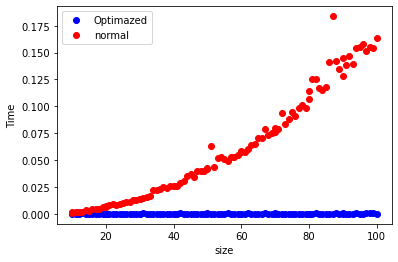

In [2]:
df = pd.read_csv('schelling_optimization_size_0-01.csv',delimiter=";")
plt.plot(df['size'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['size'],df['normal time(s)'],'ro',label="normal")
plt.xlabel("size")
plt.ylabel("Time")
plt.legend()

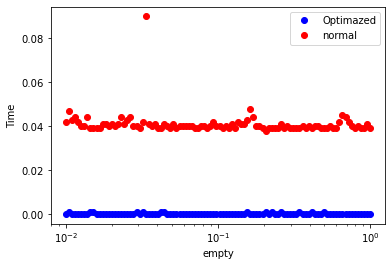

In [4]:
df = pd.read_csv('schelling_optimization_empty_50.csv',delimiter=";")
plt.plot(df['empty'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['empty'],df['normal time(s)'],'ro',label="normal")
plt.xlabel("empty")
plt.ylabel("Time")
plt.xscale('log')
plt.legend()

In [12]:
df2 = pd.read_csv('schelling_values_100_model_2_30.csv',delimiter=";")
df3 = pd.read_csv('schelling_values_100_model_3_30.csv',delimiter=";")
df2 = df2.where(df2['number of iterations']!=30000)
df3 = df3.where(df3['number of iterations']!=30000)
indexes = df2['vacant'].drop_duplicates()
deviation2 = pd.DataFrame()
deviation3 = pd.DataFrame()
for i in indexes:
    deviation2 = pd.concat(deviation2,df2.where(df2['vacant']==i).std()) 
    deviation3 = pd.concat(deviation3,df3.where(df3['vacant']==i).std()) 
df2 = df2.groupby("vacant").mean()
df3 = df3.groupby("vacant").mean()
print(deviation2)

C:\Users\Quim\AppData\Local\Temp/ipykernel_7824/2975948714.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  deviation2 = pd.concat(deviation2,df2.where(df2['vacant']==i).std())


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

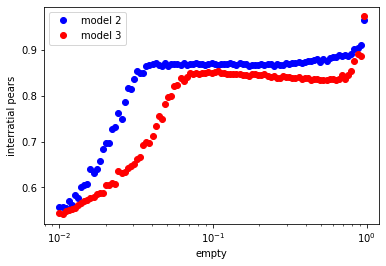

In [10]:
plt.plot(df2.index,df2['mean interratial pears final'],'bo',label="model 2")
plt.plot(df3.index,df3['mean interratial pears final'],'ro',label="model 3")
plt.xlabel("empty")
plt.ylabel("interratial pears")
plt.xscale('log')
plt.legend()